# Table of contents
* [Introduction](#section1)

* [Objective](#section2)

* [Importing Libraries](#section3)

* [Data Analysis](#section4)

    - [Read in the Data](#section5)
    
    - [Data Description](#section6)
    - [Cleaning and Feature Engineering](#section12)


<a id='section1'></a>
# Introduction

Elo is one of the largest payment brands in Brazil. It has built many partnerships with merchants in order to offer promotions to cardholders. Kaggle provided a dataset consisting of historical transactions, new merchants transactions and merchant data. It also has a preset training and testing data consisting of non-described features. Since this is a kaggle competetion most of the data is well described and so some of the typical data exploratory analysis can be skipped. 

In the following sections the objectives, data exploration will be explained in more detail.


<a id='section2'></a>
# Objective

The objective of this competetion is to develop algorithms to identify and serve the most relevant opportunities to individuals by uncovering signal in customer loyality. This can enable Elo to create good experience for its customers. 

Before getting into developing a good algorithm, understanding the data is vital. The first and major part of this kernel will be on data exploration and getting the data ready for some machine learning algorithm.


<a id='section3'></a>
# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime, time, warnings
#import lightgbm as lgb
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import keras
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb



Using TensorFlow backend.


The first part of solving this problem is to understand the data. There are 5 datasets to consider. Lets start with the 1st and the largest dataset:

<a id='section4'></a>
# Data Analysis

Under this segment we'll look at the data and engineer it to our needs. However since this is a dataset from a kaggle competition most of the data is clearly described so we dont have to test it to find out what needs to be done in case of inconsistencies.                       
Lets start with taking a look at the data. Below we will read and look at a sample of the datasets. 

<a id='section5'></a>
## Read in the data

The Elo data comes in 5 different datasets, we will read all the data below. They are all in csv format which makes the reading into a dataframe easy. To help with the run time of various data manipulations and machine learning training time, a special custom function 'reduce_mem_usage' is used to reduce the size of the datasets. 

In [34]:
Hist_transactions = reduce_mem_usage(pd.read_csv(r"D:\Datasets\all\historical_transactions.csv", encoding="ISO-8859-1"))
merchants = reduce_mem_usage(pd.read_csv(r"D:\Datasets\all\merchants.csv", encoding="ISO-8859-1"))
new_merchant_transactions = reduce_mem_usage(pd.read_csv(r"D:\Datasets\all\new_merchant_transactions.csv", encoding="ISO-8859-1"))
train_Raw = reduce_mem_usage(pd.read_csv(r"D:\Datasets\all\train.csv", encoding="ISO-8859-1"))
test_Raw = reduce_mem_usage(pd.read_csv(r"D:\Datasets\all\test.csv", encoding="ISO-8859-1"))

Mem. usage decreased to 1749.11 Mb (43.7% reduction)
Mem. usage decreased to 30.32 Mb (46.0% reduction)
Mem. usage decreased to 114.20 Mb (45.5% reduction)
Mem. usage decreased to  4.04 Mb (56.2% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)


In [3]:
"""
Hist_transactions = pd.read_csv(r"~/Downloads/all/historical_transactions.csv", encoding="ISO-8859-1")
merchants = pd.read_csv(r"~/Downloads/all/merchants.csv", encoding="ISO-8859-1")
new_merchant_transactions = pd.read_csv(r"~/Downloads/all/new_merchant_transactions.csv", encoding="ISO-8859-1")
train_Raw = pd.read_csv(r"~/Downloads/all/train.csv", encoding="ISO-8859-1")
test_Raw = pd.read_csv(r"~/Downloads/all/test.csv", encoding="ISO-8859-1")
#Xtest = pd.read_csv("D:\Datasets\all\test.csv", encoding="ISO-8859-1")
"""

'\nHist_transactions = pd.read_csv(r"~/Downloads/all/historical_transactions.csv", encoding="ISO-8859-1")\nmerchants = pd.read_csv(r"~/Downloads/all/merchants.csv", encoding="ISO-8859-1")\nnew_merchant_transactions = pd.read_csv(r"~/Downloads/all/new_merchant_transactions.csv", encoding="ISO-8859-1")\ntrain_Raw = pd.read_csv(r"~/Downloads/all/train.csv", encoding="ISO-8859-1")\ntest_Raw = pd.read_csv(r"~/Downloads/all/test.csv", encoding="ISO-8859-1")\n#Xtest = pd.read_csv("D:\\Datasets\x07ll\test.csv", encoding="ISO-8859-1")\n'

<a id='section6'></a>
## Data Description

Lets start with Historical transactions. 

<a id='section7'></a>
### Historical Transactions

This dataset consists of upto 3 months worth of transactions for each card. 


In [35]:
Hist_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [24]:
Hist_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


We can see above that the purchase date consists of date and time but the datatype is object instead of a datetime type, this needs to be changed. The features - authorized_flag, category_1 and category_3 are object variables, they need to be converted to integers. 

<a id='section8'></a>
### New Merchant Transactions

Now lets look at new merchant transactions, this dataset consists of 2 months worth of transactions 
for each card containing all purchases that the card made at a certain merchant that were not visited in the historical data. 

In [25]:
new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float16
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(2), int16(3), int8(3), object(6)
memory usage: 114.2+ MB


In [11]:
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


This dataset is similar to the historical transactions dataset and has the same issues to be dealt with such as the purchase_date being object instead of datetime.

<a id='section9'></a>
### Merchant Data

Next we'll look at the merchant data. This data consists of information related to each merchants. 

In [26]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int32
merchant_category_id           334696 non-null int16
subsector_id                   334696 non-null int8
numerical_1                    334696 non-null float16
numerical_2                    334696 non-null float16
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float32
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int8
avg_sales_lag6                 334683 non-null float32
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int8
avg_sales_lag12                334683 non-null float32
avg_purchases_lag12       

In [4]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


The merchants information is given in the data is location, products, markets and sales. Certain features marked as categories are not explained in the data description by Kaggle. Certain features such as category_1, category_2, etc are also in historical trasactions and new merchant transactions datasets but its unclear if they represent the same categories which makes merging these tables to make a training set unwise. Taking this inot consideration we are not going to use merchant data in our training and testing data. 

<a id='section10'></a>
### Train Data

Upnext is the train data, this dataset was made available by kaggle. 

In [27]:
train_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int8
feature_2             201917 non-null int8
feature_3             201917 non-null int8
target                201917 non-null float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [7]:
train_Raw.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


The train dataset has features- 1,2,3 and the data description doesnt explain what these are, so we are going to use these as part of the final training dataset and see if they are of any use at all. The target data is what are expected to predict in the testing data. 

<a id='section11'></a>
### Test Data

This is similar to training dataset without the target column. 

In [28]:
test_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int8
feature_2             123623 non-null int8
feature_3             123623 non-null int8
dtypes: int8(3), object(2)
memory usage: 2.2+ MB


In [10]:
test_Raw.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


This precomiled data will be part of the test dataset we'll be using to test our algorithm.

Our final training and testing data will be a combination of historical tranactions, new merchant transactions and train_Raw or test_Raw. Before we can merge and create these datasets, we need to clean and get the datasets ready for merger. 

<a id='section12'></a>
## Cleaning and Feature Engineering

There are lot of opensource cleaning tools available for users. Generally cleaning is a mandatory requirement for many datasets but luckily for us, since this data is from a kaggle competition we can assume that the usual issues such as data repetition are taken care off prior to releasing it to public and so we will only look to see if there is any missing data. 

In [29]:
test_Raw.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [16]:
train_Raw.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [30]:
Hist_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [31]:
new_merchant_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

Considering the relative small percent of the missing values we can simply drop these rows and it should not have a large impact on the final result. 

In [36]:
test_Raw.dropna(inplace=True)
Hist_transactions.dropna(inplace=True)
new_merchant_transactions.dropna(inplace=True)

Having taken care of the missing data lets look at the next part of the feature engineering. 

The train and test data have 'card_id' values which are non-repeating because we are trying to predict the loyality of each customer but in Hist_transactions, new_merchant_transactions the 'card_id' values are repeated since this contains all transactions done by a card. So these datasets need to be grouped by 'card_id' values but doing so can have drastic impact on the other columns in those datasets. To avoid this, we'll have to make some changes to the datasets. 

In [37]:
t = time.time()
Hist_transactions = data_cleaning(Hist_transactions)
new_merchant_transactions = data_cleaning(new_merchant_transactions)
print(" Time: ",time.time() - t)

 Time:  17.886318683624268


In the above, we are changing the values of columns like 'authorized_flag' from 'Y' and 'N' to 1 and 0 respectively using a custom function. This is a necessary step so as to allow the machine learning algorithm to train properly. 

In [39]:
t = time.time()
Hist_transactions = pd.get_dummies(Hist_transactions, columns=['category_2', 'category_3'])
new_merchant_transactions = pd.get_dummies(new_merchant_transactions, columns=['category_2', 'category_3'])

agg_fun = {'authorized_flag': ['sum', 'mean']}
auth_mean = Hist_transactions.groupby(['card_id']).agg(agg_fun)
auth_mean.columns = ['_'.join(col).strip() for col in auth_mean.columns.values]
auth_mean.reset_index(inplace=True)
print(" Time: ",time.time() - t)
authorized_transactions = Hist_transactions[Hist_transactions['authorized_flag'] == 1]
Hist_transactions = Hist_transactions[Hist_transactions['authorized_flag'] == 0]
gc.collect()

 Time:  12.903069257736206


300

When we are grouping a dataset on 1 column and that dataset has other columns with discrete values then they all need to be seperated into different columns so that when they are grouped the data doesnt get modified in a bad way. The above does this exact thing, it seperates Category_2 into Category_2_1.0, Category_2_2.0, etc.

Having a date/time data on the dataset also does not work for any machine learning algorithm, so we have to convert the date/time data to integer values. Below we are converting the 'purchase month' to month number of the year. 

In [41]:
Hist_transactions['purchase_month'] = Hist_transactions['purchase_date'].dt.month
authorized_transactions['purchase_month'] = authorized_transactions['purchase_date'].dt.month
new_merchant_transactions['purchase_month'] = new_merchant_transactions['purchase_date'].dt.month

In [11]:
history = aggregate_transactions(Hist_transactions)
history.columns = ['hist_' + c if c != 'card_id' else c for c in history.columns]
history[:5]
gc.collect()

203

In [12]:
authorized = aggregate_transactions(authorized_transactions)
authorized.columns = ['auth_' + c if c != 'card_id' else c for c in authorized.columns]
authorized[:5]
gc.collect()

203

In [13]:
new = aggregate_transactions(new_merchant_transactions)
new.columns = ['new_' + c if c != 'card_id' else c for c in new.columns]
new[:5]
gc.collect()

203

The aggregate function is used to aggregate the data when it is grouped around the 'card_id' and does so without compromising the data. And then we merge all the seperate datasets into training and testing data which we will use to make predictions. 

At this point we have everything that we need to make up the final training and testing data. We are going to merge 'history', 'authorized' and 'new' with 'train_Raw' and the 'test_Raw' data. 

In [102]:
t = time.time()
train_Raw = pd.merge(train_Raw, history, on='card_id', how='left')
test_Raw = pd.merge(test_Raw, history, on='card_id', how='left')
print(" Time: ",time.time() - t)

t = time.time()
train_Raw = pd.merge(train_Raw, authorized, on='card_id', how='left')
test_Raw = pd.merge(test_Raw, authorized, on='card_id', how='left')
print(" Time: ",time.time() - t)

t = time.time()
train_Raw = pd.merge(train_Raw, new, on='card_id', how='left')
test_Raw = pd.merge(test_Raw, new, on='card_id', how='left')
print(" Time: ",time.time() - t)

 Time:  0.9336967468261719
 Time:  0.9756865501403809
 Time:  0.9596920013427734


When we merge there could be some rows with missing data, so we remove this. 

In [103]:
train_Raw.fillna(value=0, inplace=True)
test_Raw.fillna(value=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201917 entries, 0 to 201916
Columns: 105 entries, first_active_month to new_purchase_date_max
dtypes: float16(6), float32(10), float64(84), int8(3), object(2)
memory usage: 144.6+ MB


In [104]:
submission = test_Raw[['card_id']]
x_test = test_Raw.drop(['first_active_month', 'card_id'], axis=1)
train_Raw = train_Raw.drop(['first_active_month', 'card_id'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123623 entries, 0 to 123622
Columns: 104 entries, first_active_month to new_purchase_date_max
dtypes: float16(5), float32(10), float64(84), int8(3), object(2)
memory usage: 88.3+ MB


In [105]:
X = (train_Raw.drop(['target'], axis=1))
Y = train_Raw[['target']]

,feature_1,feature_2,feature_3,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,...,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max
0,3,3,1,11.0,0.0,0.0,1.0,0.0,0.000000,0.000000,...,3.0,1.0,1.154701,2.000000,2.0,2.0,0.000000,2193863.0,1.517651e+09,1.519845e+09
1,2,3,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,1.0,0.755929,3.428571,4.0,3.0,0.534522,4167689.0,1.520080e+09,1.524247e+09
2,5,1,1,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,10.0,10.0,0.000000,3.000000,3.0,3.0,0.000000,0.0,1.519916e+09,1.519916e+09
3,2,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,1.0,1.054093,3.222222,4.0,3.0,0.440959,3838554.0,1.520162e+09,1.524000e+09
4,5,1,1,23.0,0.0,0.0,0.0,0.0,0.043478,0.956522,...,2.0,1.0,0.447214,3.000000,3.0,3.0,0.000000,464530.0,1.520132e+09,1.520597e+09


,feature_1,feature_2,feature_3,target,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,...,new_installments_max,new_installments_min,new_installments_std,new_purchase_month_mean,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max
0,5,2,1,-0.820312,12.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.478261,4.0,3.0,0.510754,4742309.0,1.520259e+09,1.525001e+09
1,4,1,0,0.392822,9.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,2.500000,3.0,2.0,0.547723,4887632.0,1.517505e+09,1.522393e+09
2,2,2,0,0.687988,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.000000,4.0,4.0,0.000000,0.0,1.524937e+09,1.524937e+09
3,4,3,0,0.142456,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.600000,4.0,3.0,0.547723,3525634.0,1.520424e+09,1.523949e+09
4,1,3,0,-0.159790,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.575758,4.0,3.0,0.501890,4949682.0,1.519992e+09,1.524941e+09


<a id='section13'></a>
## Machine Learning

Now that the data is ready lets figure out the machine learning algorithm that we can use. Given the many features that we have in the dataset (103) and the size of the dataset we need some algorithm that can converge on a good prediction quickly. So we are going to use XGBoost, this is a flexible and very popular machine learning algorithm. Decision trees are typically more useful in classification problems but XGBoost works fantastically for regression problems too. 

In [108]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25)

In [ ]:
#-------------- XGboost (untuned)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(x_train,y_train)

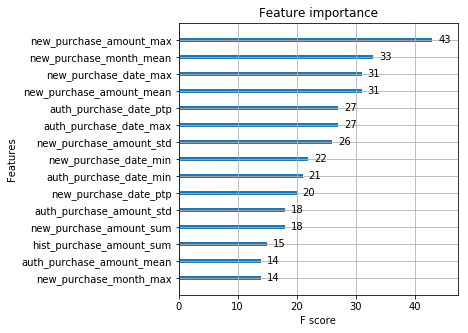

In [110]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg,max_num_features = 15)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = xg_reg.predict(x_train)
rms_train = sqrt(mean_squared_error(y_train, pred_train))

pred_test = xg_reg.predict(x_val)
rms_test = sqrt(mean_squared_error(y_val, pred_test))

#del Xtrain, Ytrain
gc.collect()
print('Train RMSE: {0} Test RMSE: {1}'.format(rms_train,rms_test))

Train RMSE: 3.73594383580633 Test RMSE: 3.7533085532807413


In [113]:
submission['target'] = xg_reg.predict(x_test)

D:\Users\hari0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
submission.shape

(123623, 2)

In [115]:
submission.to_csv("submission.csv", index=False)

In [31]:
def aggregate_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
    'category_1': ['sum', 'mean'],
    'category_2_1.0': ['mean'],
    'category_2_2.0': ['mean'],
    'category_2_3.0': ['mean'],
    'category_2_4.0': ['mean'],
    'category_2_5.0': ['mean'],
    'category_3_0': ['mean'],
    'category_3_1': ['mean'],
    'category_3_2': ['mean'],
    'merchant_id': ['nunique'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'],
    'city_id': ['nunique'],
    'subsector_id': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
    'installments': ['sum', 'mean', 'max', 'min', 'std'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['_'.join(col).strip() for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history


In [32]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [33]:
def data_cleaning(df):
    df['authorized_flag'] = df['authorized_flag'].map({'Y':1, 'N':0})
    #df['purchase_date'] = df['purchase_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])
    df['category_1'] = df['category_1'].map({'Y':1, 'N':0}) 
    df['category_3'] = df['category_3'].map({'A':0, 'B':1, 'C':2}) 
    return df